# Dubin's car dynamical model

In [1]:
from sympy import *
import numpy as np
init_printing()

In [2]:
# state
x, y, theta = symbols('x y \\theta', real=True)
s = Matrix([x, y, theta])

# control
phi = symbols('\\phi', real=True)

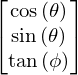

In [3]:
# state transition
ds = Matrix([
    cos(theta),
    sin(theta),
    tan(phi),
])

# state transition jacobian
dds = ds.jacobian(s)
ds

In [4]:
# homotopy parameter
alpha = symbols('\\alpha', real=True, positive=True)

# Lagrangian
L = alpha*phi + (1 - alpha)*phi**2

In [5]:
# costate variables
cs = Matrix([symbols('\\lambda_' + str(var)) for var in s])

# fullstate
fs = Matrix([s, cs])

# hamiltonian
H = cs.dot(ds) + L

In [6]:
# costate transition
dcs = Matrix([-H.diff(var) for var in s])

# fullstate transtion
dfs = Matrix([ds, dcs])

# fullstate transition jacobian
ddfs = dfs.jacobian(fs)